<img src="assets/logo.png" width="150">
<br>

**Coursebook: Forecasting Mobile Network (Internet) Traffic with Recurrent Neural Network (RNN)**

- Course Length: 6 Hours
- Last Update: September 2022

___

Developed by Wulan




The coursebook is  prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objective

The objective of this course is to provide participants with a comprehensive introduction to understanding deep learning model building for sequential data using Python. We will learn techniques on how to process sequential data to obtain a deep learning model. Syllabus includes:

- **Recurrent Neural Networks:**
    + Sequence Models
    + Vanilla RNN
    + Long Short-Term Memory (LSTM)
    + Bidirectional and Deep RNN

- **Case Study: Forecasting Mobile Network (Internet) Traffic**
    + Time series Forecasting
    + Visualize the time series
    + Training with validation: define the architecture, compile the model, model fitting and evaluation
    + Testing on unseen data


___

# Libraries

In [1]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import tensorflow as tf
import tensorflow.keras as keras

# set seed
import random
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

___

# Introduction to RNN

Ordinary FNN (Feedforward Neural Network) are only meant for data points/tabular data independent of each other. However, suppose we have data in a sequence such that **one data point depends upon the previous one**. In that case, we need to modify the neural network to incorporate the dependencies between these data points. 

Simply put, sequence data is any data where the order matters. We often encounter several sequential data in everyday life, such as news text data, audio music, weather forecasts, sensors, stock prices, etc. Sequential data processing as above is not suitable to be carried out with feed-forward models that we are familiar with, such as linear models, multi-layer perceptrons, and CNNs. The main obstacles are:

- these models have no 'memory', models will process each sample the same way without considering the previous samples.
- these models assume IID (independent and identically distributed) data, which sequential data cannot fulfill because one sample is closely dependent on other samples.
- these models process input with a fixed input length, whereas sequential data has an indefinite length.
- these models cannot know the correlation between the previous input to the following input

## How RNN Works

A recurrent neural network or RNN is a neural network which maps from an input space of sequences to an output space of sequences in a stateful way. That is, **the prediction of output $y_t$ depends not only on the input $x_t$, but also on the hidden state of the system, $h_t$, which gets updated over time, as the sequence is processed** (Murphy, 2021). In short, Recurrent Neural Networks use their reasoning from previous experiences to inform the upcoming events.

<figure>
    <center>
    <img src="assets/RNN-rolled.png" width="12%">
     <figcaption>Rolled RNN Structure</figcaption> 
    </center>
</figure>

So, in general, a recurrent neural network has a recurrent core cell. It will take some input x, feed that input into the RNN that has some internal hidden state, and that new input will update the internal hidden state. That **internal hidden state will be then fed back to the model the next time it reads an input.**
And frequently, we will want our RNNs to produce some output at every step, so we'll have this pattern where it will read an input, update its hidden state, and then make an output.

<figure>
    <center>
    <img src="assets/RNN-unrolled.png" width="70%">
<figcaption>Unrolled RNN Structure</figcaption>
<figcaption>Source: https://karpathy.github.io/2015/05/21/rnn-effectiveness/</figcaption>
    </center>
</figure>

## Vanilla RNN Cell

Vanilla RNN work by iteratively updating a hidden state. So in the below illustration, we're taking our current input, vector $x_t$, and our previous hidden state, vector $h_{t-1}$, and then we stack them. We perform matrix multiplication with our weight matrix, and then squash that output through a **tanh activation function** and that will give us our next hidden state.

<figure>
    <center>
    <img src="assets/LSTM3-SimpleRNN.png" width="70%">
<!--     <figcaption>Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/</figcaption> -->
    </center>
</figure>

$$\large h_t = tanh(W_{hh} h_{t-1} + W_{xh} x_t) $$

$$\large y_t =  W_{hy} h_t$$

Note:
- $W_{hh}$: weight matrix from hidden to hidden layer
- $W_{xh}$: weight matrix from input to hidden layer
- $y_t$   : output vector
- $W_{hy}$: weight matrix from hidden to output layer

## Types of RNN

<figure>
    <center>
    <img src="assets/rnn_input_output.jpeg" width="70%">
<figcaption>Types of RNN Architecture</figcaption> 
<figcaption>Source: https://karpathy.github.io/2015/05/21/rnn-effectiveness/</figcaption> 
    </center>
</figure>

Each rectangle is a vector and arrows represent functions (e.g. matrix multiply). Input vectors are in red, output vectors are in blue and green vectors hold the RNN's state. From left to right:

- (1) One-to-one: Vanilla mode of processing without RNN, from fixed-sized input to fixed-sized output (e.g. image classification).
- (2) One-to-many: Sequence output (e.g. image captioning takes an image and outputs a sentence of words).
- (3) Many-to-one: Sequence input (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment).
- (4) Many-to-many: Sequence input and sequence output (e.g. Machine Translation: an RNN reads a sentence in English and then outputs a sentence in French).
- (5) Many-to-many: Synced sequence input and output (e.g. video classification where we wish to label each frame of the video).

Notice that in every case are no pre-specified constraints on the lengths sequences because the recurrent transformation (green) is fixed and can be applied as many times as we like.

___

# RNN for Time Series Forecasting

## **1. Generating sample time series dataset**

For now, we'll generate time series containing 1000 numbers with seasonality following the sin wave.

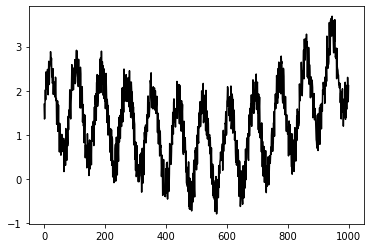

In [2]:
# generate random data
N = 1000 # number of data
t = np.arange(0, N) # time index
x = np.sin(0.075*t) + np.cos(0.005*t) + 0.002*t + np.random.rand(N) # univariate time series
df = pd.DataFrame({'Actual': x})

# plot the data
plt.plot(df, color="black")
plt.show()

**🔎 Knowledge Check**

- Type of the time series: single univariate time series
- How is the trend and seasonality? ...
    - trend: pola umum data -> trendnya turun sampai 500, lalu naik sampai akhir/1000
    - seasonality: pola berulang/season -> seasonalitynya ada, sepertinya sekitar periode 100 akan berulang 1 pola yg sama

> eksplorasi data time series lebih lanjut: **time series decomposition**

## **2. Train-test splitting**

In machine learning, train/test split splits the data randomly, as there's no dependence from one observation to the other. That's not the case with time series data. Here, you'll want to use `shuffle=False` so that the values at the rear of the dataset for testing and everything else for training.

In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)
train, test = df_train.values, df_test.values # dataframe to array
print("TRAIN SHAPE:\t", train.shape)
print("TEST SHAPE:\t", test.shape)

TRAIN SHAPE:	 (800, 1)
TEST SHAPE:	 (200, 1)


Alternatively, you can do train-test split manually without using `sklearn`:

```{python}
train, test = x[:800], x[800:]
```

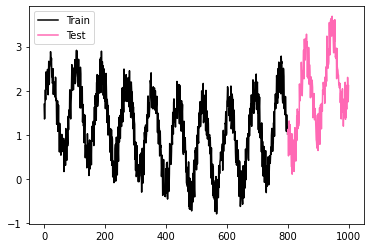

In [4]:
# visualize the dataframe after train-test split
plt.plot(df_train, label="Train", color="black")
plt.plot(df_test, label="Test", color="hotpink")
plt.legend()

## **3. Generate feature and target variable**

Time series data must be transformed into a structure of samples with input and output components before it can be used to fit a supervised learning model. This can be challenging if you have to perform this transformation manually. The Keras deep learning library provides the [`TimeseriesGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator) to automatically transform both univariate and multivariate time series data into samples, ready to train deep learning models.

In addition to specifying the input and output aspects of your time series problem, there are some additional parameters that you should configure; for example:

- `length`: The number of lag observations to use in the input portion of each sample.
- `batch_size`: The number of samples to return on each iteration.

Let's see an example:

$x$ has the following sequence data.
$x = \begin{bmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10
\end{bmatrix}$

For `length=1`, $x$ (left) input and its $y$ (right) prediction become:
$\begin{bmatrix}
1\\ 
2\\ 
3\\ 
4\\ 
..\\ 
9
\end{bmatrix} \begin{bmatrix}
2\\ 
3\\ 
4\\ 
5\\ 
..\\ 
10
\end{bmatrix}$

For `length=3`, $x$ and $y$ contain:
$\begin{bmatrix}
1 & 2 & 3\\ 
2 & 3 & 4\\ 
3 & 4 & 5\\ 
4 & 5 & 6\\ 
.. & .. & ..\\ 
7 & 8 & 9
\end{bmatrix}\begin{bmatrix}
4\\ 
5\\ 
6\\ 
7\\ 
..\\ 
10
\end{bmatrix}$

As you have noticed the sizes of x input and y output become different.

In [6]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [9]:
# for illustration purpose only
dummy = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
dummy_generator = TimeseriesGenerator(data=dummy, targets=dummy, length=3, batch_size=1)

# loop
for feature, target in dummy_generator:
    print("FEATURE:\n", feature, "\tTARGET:", target)
    print()

FEATURE:
 [[1 2 3]] 	TARGET: [4]

FEATURE:
 [[2 3 4]] 	TARGET: [5]

FEATURE:
 [[3 4 5]] 	TARGET: [6]

FEATURE:
 [[4 5 6]] 	TARGET: [7]

FEATURE:
 [[5 6 7]] 	TARGET: [8]

FEATURE:
 [[6 7 8]] 	TARGET: [9]

FEATURE:
 [[7 8 9]] 	TARGET: [10]



In the cell below, let's generate feature and target for our `train` and `test` data:

In [11]:
# your code here

# lag predictor
look_back = 50

# define generator
#Pak Christoper
train_generator = TimeseriesGenerator(data=train, targets=train, length=look_back, batch_size=1)
test_generator = TimeseriesGenerator(data=test, targets=test, length=look_back, batch_size=1)

## **4. Fitting RNN model**

Next, we create the keras Sequential model. This model is the same as the usual neural network modeling. The difference is that this modeling uses an additional [SimpleRNN layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN). We use SimpleRNN layer that is Fully-connected RNN where the output is to be fed back to input.

> 💡 Important: RNN model requires three-dimensional input data: `(number_of_sequences, look_back, n_features)`

- `number_of_sequences`: pasangan feature dan target
- `look_back`: berapa banyak prediktor yang digunakan: 50
- `n_features`: berapa variabel yang digunakan untuk memprediksi: 1 (univariate)

In [12]:
def init_model_rnn():
    # define architecture
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape= (look_back, 1))) #(look_back, n_features)
    model.add(keras.layers.SimpleRNN(units=64, activation='tanh'))
    model.add(keras.layers.Dense(units=8, activation='relu'))
    model.add(keras.layers.Dense(units=1))
    
    # model compile
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

model_rnn = init_model_rnn()
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,753
Trainable params: 4,753
Non-trainable params: 0
_________________________________________________________________


**🔎 Knowledge Check**

- How many units should we use in the output layer? 1
- Loss function during model compilation: MSE
- What type of RNN architecture is it? many-to-one. (digunakan 50 lag predictor untuk memprediksi 1 nilai ke depan)

In [13]:
# model fitting
model_rnn.fit(train_generator, epochs=10)

Epoch 1/10
750/750 [==============================] - 9s 10ms/step - loss: 0.1576
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1400
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 0.1349
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.1271
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1339
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1638
Epoch 7/10
750/750 [==============================] - 8s 10ms/step - loss: 0.1412
Epoch 8/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1387
Epoch 9/10
750/750 [==============================] - 7s 10ms/step - loss: 0.1392
Epoch 10/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1386


## **5. Evaluate the model**

Loss visualizations can be used with the model.history function.

In [15]:
model_rnn.history.history['loss']

[0.15761978924274445,
 0.14000751078128815,
 0.134893998503685,
 0.12708066403865814,
 0.1338835507631302,
 0.16382645070552826,
 0.1412268579006195,
 0.13866187632083893,
 0.13922718167304993,
 0.13859723508358002]

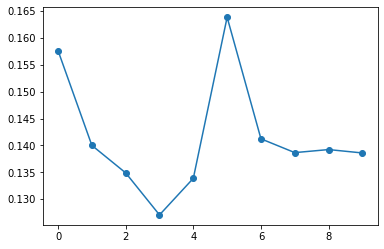

In [14]:
plt.plot(model_rnn.history.history['loss'], marker='o')
plt.show()

In [16]:
train_loss = model_rnn.evaluate(train_generator)
test_loss = model_rnn.evaluate(test_generator)
print("TRAIN LOSS:", train_loss)
print("TEST LOSS:", test_loss)

150/150 [==============================] - 1s 5ms/step - loss: 0.2041
TRAIN LOSS: 0.1306074857711792
TEST LOSS: 0.20408742129802704


misalkan kita forecast suatu data dengan satuan dollar.

satuan dari loss yang ditampilkan dengan menggunakan mean_squared_error adalah **dollar kuadrat**

In [19]:
from math import sqrt
sqrt(train_loss)

#root_mean_squared_error

0.3613965768669914

We use the fitted model to predict the train and test data, and see how the predicted data align with the actual data.

In [20]:
train_predict = model_rnn.predict(train_generator)

750/750 [==============================] - 3s 4ms/step


In [21]:
test_predict = model_rnn.predict(test_generator)

150/150 [==============================] - 1s 4ms/step


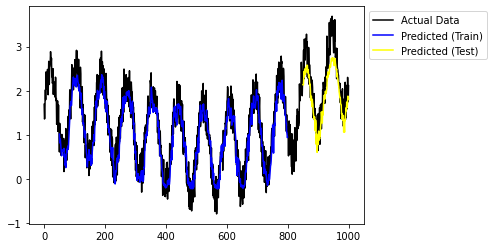

In [22]:
# visualization
plt.plot(x, label="Actual Data", color="black")
plt.plot(range(look_back, len(train)), train_predict, label="Predicted (Train)", color="blue")
plt.plot(range(look_back+len(train), len(x)), test_predict, label="Predicted (Test)", color="yellow")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [23]:
x.shape

(1000,)

In [24]:
train.shape

(800, 1)

In [25]:
train_predict.shape

(750, 1)

**🔎 Knowledge Check**

Why does the length of `train_predict` differs from `train` and `test_predict` differs from `test`?

> karena butuh 50 periode data ke belakangnya utk prediksi data ke depan, jadi 50 data pertama belum ada 50. `look_back` = 50

## **6. Forecast the next value**

From here, we can use the model to forecast the next value (index 1001) by feeding in the **last batch of data**.

Don't forget to reshape the data before predicting!
`(number_of_sequences, look_back, n_features)`


In [27]:
x[-50:]

array([2.86264389, 2.86331746, 3.59679198, 3.11536527, 3.60885888,
       2.92692896, 2.75784264, 2.80031183, 2.73213655, 2.96345944,
       2.27405991, 2.95838134, 2.54429979, 2.492296  , 2.47316309,
       2.37349287, 2.35464481, 2.13704921, 2.17994979, 2.06860339,
       2.12182407, 2.16913903, 1.73222188, 1.94829889, 1.98686074,
       1.36556746, 1.82978057, 1.51379513, 1.64903725, 2.04601493,
       1.52587511, 1.66833017, 1.20076754, 1.4812196 , 1.81422001,
       1.49730598, 1.40119773, 1.50488671, 2.19294761, 1.35511855,
       1.76670231, 1.40188119, 1.92723687, 1.58441824, 2.12674906,
       1.81555446, 2.30448557, 2.02673718, 1.75305535, 2.11600068])

In [28]:
x[-50:].reshape((1, 50, 1))

array([[[2.86264389],
        [2.86331746],
        [3.59679198],
        [3.11536527],
        [3.60885888],
        [2.92692896],
        [2.75784264],
        [2.80031183],
        [2.73213655],
        [2.96345944],
        [2.27405991],
        [2.95838134],
        [2.54429979],
        [2.492296  ],
        [2.47316309],
        [2.37349287],
        [2.35464481],
        [2.13704921],
        [2.17994979],
        [2.06860339],
        [2.12182407],
        [2.16913903],
        [1.73222188],
        [1.94829889],
        [1.98686074],
        [1.36556746],
        [1.82978057],
        [1.51379513],
        [1.64903725],
        [2.04601493],
        [1.52587511],
        [1.66833017],
        [1.20076754],
        [1.4812196 ],
        [1.81422001],
        [1.49730598],
        [1.40119773],
        [1.50488671],
        [2.19294761],
        [1.35511855],
        [1.76670231],
        [1.40188119],
        [1.92723687],
        [1.58441824],
        [2.12674906],
        [1

In [30]:
# your code here
last_batch = x[-50:].reshape((1, 50, 1))
model_rnn.predict(last_batch)

1/1 [==============================] - 0s 219ms/step


array([[1.7944992]], dtype=float32)

> 💡 Notes:
> - We can iteratively forecast the next value (for index 1002 onwards) by using the newly predicted value. But for simplicity, let's stop here, we'll discuss about this later.
> - Usually in building a good time series forecasting model, if we satisfied with the performance of our model, we re-trained the model from scratch using the whole data but using the same architecture. For instance:

```{python}
generator_combine = TimeseriesGenerator(data=x, targets=x, length=look_back, batch_size=1)
model_combine = init_model_rnn()
model_combine.fit(generator_combine, epochs=10)
```

# 🏄‍ Dive Deeper: Deep RNN (Stacked Layers)


RNN and LSTM layers can be stacked in the same way that other layer types can be stacked. Stacking hidden layers makes the model deeper.

<figure>
    <center>
    <img src="assets/stacked_rnn.png" width="40%">
    </center>
</figure>

One addition to the configuration that is required is that the layer prior to each subsequent layer **must return the sequence**. This can be done by setting the parameter **`return_sequences=True`** on the layer. This will return one output for each input time step and provide a 3D array.

The input shape for recurrent layers: `(number_of_sequences, time_steps, input_features)`

The outputs of the recurrent layers in each case:
- If `return_sequences=True`, then `(number_of_sequences, time_steps, output_features)`
- If `return_sequences=False`, then `(number_of_sequences, output_features)`

<figure>
    <center>
    <img src="assets/return_sequences.jpg" width="30%">
    </center>
</figure>

> 💡Note: We can continue to add hidden layers as long as the prior layer provides a 3D output as input for the subsequent layer. For further information about `return_sequences` and other parameters in LSTM layer, please refer to its [Official Documentation.](https://keras.io/api/layers/recurrent_layers/lstm/)

> **Your main task**: Train a stacked SimpleRNN model (at least 2 stacks) on previous dataset (`train_generator`) and evaluate it also on `test_generator`

Example of stacked SimpleRNN model:

```{python}
[
keras.layers.InputLayer(input_shape=___),
keras.layers.SimpleRNN(units=___, return_sequences=True),
keras.layers.SimpleRNN(units=___, return_sequences=False), # make sure the last stack doesn't return sequences
keras.layers.Dense(units=___)
]
```

Remember, you can stack Dense and Dropout layer too

In [ ]:
def init_model_stacked_rnn():
    # define architecture
    model = keras.models.Sequential([
        # input (mandatory)
        keras.layers.InputLayer(___),
        
        # stacked rnn (mandatory)
        keras.layers.SimpleRNN(___),
        ___,
        
        # dense (optional)
        ___,
        
        # output (mandatory)
        keras.layers.Dense(units=___)
    ])
    
    # model compile
    model.compile(___)
    
    return model
    
model_stacked_rnn = init_model_stacked_rnn()
model_stacked_rnn.summary()

In [ ]:
# fitting model
___

In [ ]:
# evaluate train and test loss
train_loss = ___
test_loss = ___
print("TRAIN LOSS:", train_loss)
print("TEST LOSS:", test_loss)

In [ ]:
# OPTIONAL: visualization
___

> 📝 **Make a conclusion**: Based on the train and test loss, is your stacked SimpleRNN better than the one we build together `model_rnn`?
> - If yes, explain what do you do to improve the model?
> - If no, then why?

___

# Shortcoming of RNN: Vanishing Gradient Problem

RNNs face a **short-term memory** problem, and the **vanishing gradient problem** causes it. As RNN processes more steps, it suffers from vanishing gradient more than other neural network architectures. In RNN, to train the network, you backpropagate through time. At each step, the gradient is calculated. The gradient is used to update weights in the network. If the effect of the previous layer on the current layer is small, then the gradient value will be small and vice-versa. If the gradient of the previous layer is smaller, then the gradient of the current layer will be even smaller. This makes the gradients exponentially shrink down as we backpropagate. A smaller gradient means it will not affect the weight update. Due to this, the network does not learn the effect of earlier inputs. Thus, causing the short-term memory problem.

<figure>
    <center>
    <img src="assets/vanishing_gradient.gif" width="30%">
<figcaption>Gradients shrink as it back-propagates through time</figcaption> 
    </center>
</figure>

Image Source: [Michael Phi's TDS Medium](https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9)

> Imagine that for example a fraction is 1⁄4, multiplied by another fraction such as 1⁄3, then in one operation the value is 1⁄12. Multiplied by other fractions such as 1⁄5, the value becomes 1⁄60, etc. This value will shrink exponentially, and with a small fractional value and many multiplication operations, the value will be close to zero.

The main problem is that it’s too difficult for RNN to learn to preserve information over many timesteps. In vanilla RNN the hidden state is consistently being rewritten. To overcome this problem, two specialised versions of RNN were created. They are **LSTM (Long Short Term Memory)** and **GRU (Gated Recurrent Unit)**

# LSTM

Long Short Term Memory networks are a special kind of RNN, capable of learning **long-term dependencies**. All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer. LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are **four gates**, interacting in a very special way.

<figure>
    <center>
    <img src="assets/LSTM3-chain.png" width="70%">
    <figcaption>Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/</figcaption>
    </center>
</figure>

In the above diagram, each line carries an entire vector, from the output of one node to the inputs of others. The pink circles represent pointwise operations, like vector addition, while the yellow boxes are learned neural network layers. Lines merging denote concatenation, while a line forking denote its content being copied and the copies going to different locations. These cells use the gates to regulate the information to be kept or discarded at loop operation before passing on the long term and short term information to the next cell. We can imagine these gates as filters that remove unwanted selected and irrelevant information.

Components of LSTM consists of four gates and a hidden state:

- **Input Gate ($i$)**: The input gate decides **what information will be stored** in long term memory. It only works with the information from the current input and short term memory from the previous step. At this gate, it filters out the information from variables that are not useful.

- **Forget Gate ($f$)**: The forget decides **which information from long term memory be kept or discarded** and this is done by multiplying the incoming long term memory by a forget vector generated by the current input and incoming short memory.

- **Output Gate ($o$)**: The output gate will take the current input, the previous short term memory and newly computed long term memory to produce new short term memory which will be passed on to the cell in the next time step. The output of the current time step can also be drawn from this hidden state. Simply put, the output gate **controls how many internal states you want to expose to the network** (higher layer & next time step)

- **Candidate Cell State/Gate ($\widetilde{c}$)**: a “candidate” hidden state that is computed based on the current input and the previous hidden state.

- **Hidden State ($h_t$)**: same hidden state that we had in the vanilla RNN.

When we had this vanilla recurrent neural network, it had a hidden state: $h_t = tanh \left (W \binom{h_{t-1}}{x_t}  \right)$. We used the recurrence relation to update the hidden state at every time step. In an LSTM, we actually have two hidden states at every time step. The basic idea is to partition the hidden state into a long-term part, called a memory cell $c_t$, and a short-term part, denoted $h_t$. First, when we compute new memory cell state, we take our two inputs, concatenate them, multiply them by wight matrix, and compute the new cell state using $i$ gate, $f$ gate, and $\widetilde{c}$ state. This additive update to the cell state allows long-term information to pass through, without the gradient vanishing. Next we compute the new short term state with $o$ gate and $h_t$ state. Note that $h_t$ is used as the output of the unit as well as the hidden state for the next time step. This lets the model remember what it has just output (short-term memory), whereas the cell $c_t$ acts as a long-term memory.

$$\begin{pmatrix}
i\\ 
f\\ 
o\\ 
\widetilde{c}
\end{pmatrix} = 
\begin{pmatrix}
\sigma\\ 
\sigma\\ 
\sigma\\ 
\tanh
\end{pmatrix}
W \binom{h_{t-1}}{x_t}$$

$$c_t = f \odot c_{t-1} + i \odot \widetilde{c}$$                 
$$h_t = o \odot tanh (c_t)$$

Notice that each of these gates are using a different non linearity. The input, forget and output gate
are all using **sigmoid**s, which means that their values will be between zero and one. Whereas the candidate cell state uses a **tanh**, which means its output will be between minus one and one. That is helpful to update or forget data because any number getting multiplied by 0 is 0, causing values to disappears or be “forgotten.” Any number multiplied by 1 is the same value therefore that value stay’s the same or is 'kept.' The network can learn which data is not important therefore can be forgotten or which data is important to keep.

___

# Use Case: Forecasting Mobile Network (Internet) Traffic in Milan

**1. Reading datafiles**

In this section we will build a forecasting model on mobile data traffic dataset recorded in a real-world network that covers a large city of Milan & Province of Trentino, covering the period of December 2013 based on this [paper](https://www.nature.com/articles/sdata201555). Datasets previously available in [txt format](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EGZHFV), are merged with csv format. The collected data is quite large, so we stored in a pickle file.

In [32]:
df_call = pd.read_pickle('data_input/df_call_detail_records_dec_cut.pkl').set_index(['datetime'])
df_call.head()

,squareid,internet,sms,calls
datetime,,,,
2013-12-01 06:00:00,1,77.283683,2.192212,0.819809
2013-12-01 06:00:00,2,77.465341,2.211839,0.824010
2013-12-01 06:00:00,3,77.658709,2.232732,0.828482
2013-12-01 06:00:00,4,76.757508,2.135362,0.807641
2013-12-01 06:00:00,5,70.700523,2.056988,0.753828


> data df_call merupakan multiple (9998 squareid) multivariate (internet, sms, call) time series

This dataset serves as measure of the level of interaction between the users and the mobile phone network.

- **datetime**: start interval time expressed in milliseconds. The end interval time can be obtained by adding 600,000 milliseconds (10 min) to this value;
- **squareid**: identification string of a given square of Milan/Trentino GRID;
- **sms**: activity proportional to the amount of received and sent SMSs inside a given Square id and during a given Time interval. The SMSs are received and sent from the nation identified by the Country code;
- **call**: activity proportional to the amount of received and issued calls inside the Square id during a given Time interval. The calls are received and issued from the nation identified by the Country code;
- **internet**: number of CDRs generated inside a given Square id during a given Time interval. The Internet traffic is initiated from the nation identified by the Country code;
    + a CDR is generated each time a user starts an Internet connection or ends an Internet connection. During the same connection, a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.

The dataset consists of 9998 unique `squareid`. Since the dataset is too large and need multiple neural network model to train them, let's us proceed with selected `internet` data in the area with the highest total traffic, which is `squaredid` **5161**

In [35]:
df_call['squareid'].nunique()

9998

<AxesSubplot:xlabel='datetime'>

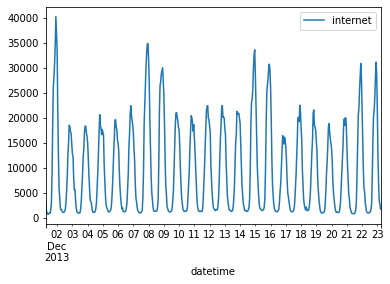

In [33]:
df_5161 = df_call[df_call['squareid'] == 5161][['internet']]
df_5161.plot()

> 💡 Important: When dealing with time series data, you have to make sure that the data is complete for each timestamp. In case the data is not complete, use `.reindex(complete_date)` to do time series padding.

In [38]:
# take the index, containing datetime
df_5161_date = df_5161.index

# make a Series of complete date
complete_date = pd.Series(pd.date_range(start=df_5161_date.min(), end=df_5161_date.max(), freq='H'))

# compare between complete_date and df_5161_date
mask = complete_date.isin(df_5161_date)

# print out all skipped datetime
# if empty, then you are good to go
complete_date[~ mask]

Series([], dtype: datetime64[ns])

In [37]:
df_5161_date = df_5161.index
pd.Series(pd.date_range(start=df_5161_date.min(), end=df_5161_date.max(), freq='H'))

0     2013-12-01 06:00:00
1     2013-12-01 07:00:00
2     2013-12-01 08:00:00
3     2013-12-01 09:00:00
4     2013-12-01 10:00:00
              ...        
523   2013-12-23 01:00:00
524   2013-12-23 02:00:00
525   2013-12-23 03:00:00
526   2013-12-23 04:00:00
527   2013-12-23 05:00:00
Length: 528, dtype: datetime64[ns]

**2. Preprocessing**

We want to split the last 7 days for data test. Since the dataset datetime contains the details of the time until the hour (dataset divided by time up to hour detail per observation), we multiply 24 hours with 7 days to get the exact observation. 

In [39]:
# your code here
df_train, df_test = train_test_split(df_5161, test_size=24*7 , shuffle=False)

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. **Data scaling is a recommended pre-processing step** when working with deep learning neural networks. Unscaled input variables can result in a slow or unstable learning process, whereas unscaled target variables on regression problems can result in exploding gradients causing the learning process to fail. Scaling preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

- `MinMaxScaler` will convert the data ranging from zero to one [0, 1]

$$x_{scaled} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$$

- `StandardScaler` will convert the data so that the mean = 0 and standard deviation = 1

$$x_{scaled} = \dfrac{x - mean(x)}{sd(x)}$$

> 💡 Important: Fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data). If you scale the data before train/test split you will get data leakage and could influence prediction accuracy and overfit.

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train)
scaled_test = scaler.transform(df_test)

Lastly, we create the `TimeseriesGenerator`, but remember to use the scaled data.

In [42]:
look_back = 24*5 #lag predictor: untuk memprediksi 1 jam ke depan, melihat pola data 5 hari ke belakang
train_gen = TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=look_back, batch_size=1)
test_gen = TimeseriesGenerator(data=scaled_test, targets=scaled_test, length=look_back, batch_size=1)

**3. Building the model**

For this case, we use [LSTM layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) instead of SimpleRNN.

In [43]:
def init_model_lstm():
    # define architecture
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(units=64, input_shape=(look_back, 1)))
    model.add(keras.layers.Dense(units=1, activation='relu'))
    
    # model compile
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

model_lstm = init_model_lstm()
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [44]:
# fitting model
model_lstm.fit(train_gen, epochs=10)

Epoch 1/10
240/240 [==============================] - 12s 40ms/step - loss: 0.0286
Epoch 2/10
240/240 [==============================] - 10s 40ms/step - loss: 0.0053
Epoch 3/10
240/240 [==============================] - 10s 42ms/step - loss: 0.0044
Epoch 4/10
240/240 [==============================] - 11s 44ms/step - loss: 0.0039
Epoch 5/10
240/240 [==============================] - 9s 38ms/step - loss: 0.0038
Epoch 6/10
240/240 [==============================] - 9s 39ms/step - loss: 0.0032
Epoch 7/10
240/240 [==============================] - 10s 41ms/step - loss: 0.0034
Epoch 8/10
240/240 [==============================] - 10s 43ms/step - loss: 0.0029
Epoch 9/10
240/240 [==============================] - 9s 39ms/step - loss: 0.0029
Epoch 10/10
240/240 [==============================] - 9s 37ms/step - loss: 0.0031


Visualize the loss per epoch using `matplotlib`:

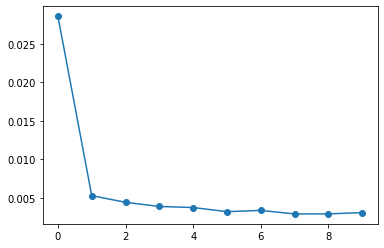

In [45]:
plt.plot(model_lstm.history.history['loss'], marker='o')
plt.show()

**4. Evaluate the model**

We can evaluate the model performance on train and test data, but remember, we are fitting the model with scaled data. So we have to **inverse transform** the prediction result in order to get the original range of data.

In [46]:
scaled_train_predict = model_lstm.predict(train_gen)
train_predict = scaler.inverse_transform(scaled_train_predict)
train_predict.shape

240/240 [==============================] - 3s 9ms/step


(240, 1)

In [47]:
# your code here
scaled_test_predict = model_lstm.predict(test_gen)
test_predict = scaler.inverse_transform(scaled_test_predict)

48/48 [==============================] - 0s 9ms/step


Now, let's visualize the prediction vs actual result and calculate the root mean squared error (RMSE).

**TRAINING DATA**

<AxesSubplot:xlabel='datetime'>

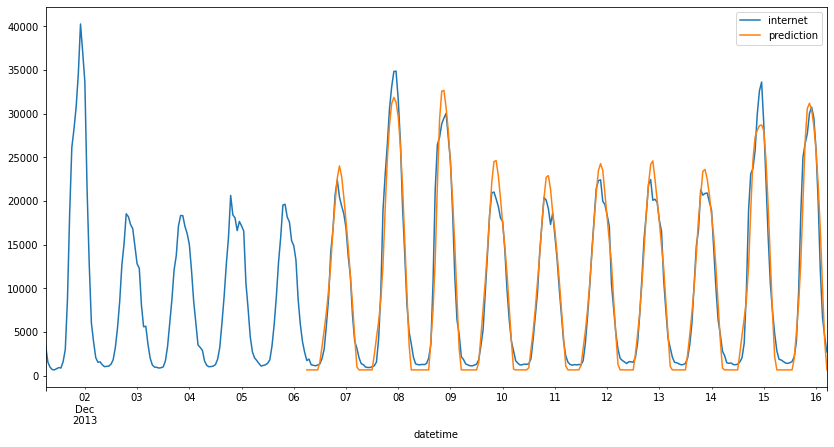

In [48]:
# create numpy array containing nan
temp = np.empty((df_train.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(train_predict):] = train_predict

df_train["prediction"] = temp

# visualize
df_train.plot(figsize=(14, 7))

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
# TRAIN RMSE
df_train = df_train.dropna()
mean_squared_error(
    y_true=df_train['internet'],
    y_pred=df_train['prediction'],
    squared=False
)

1909.0811621360413

**TESTING DATA**

<AxesSubplot:xlabel='datetime'>

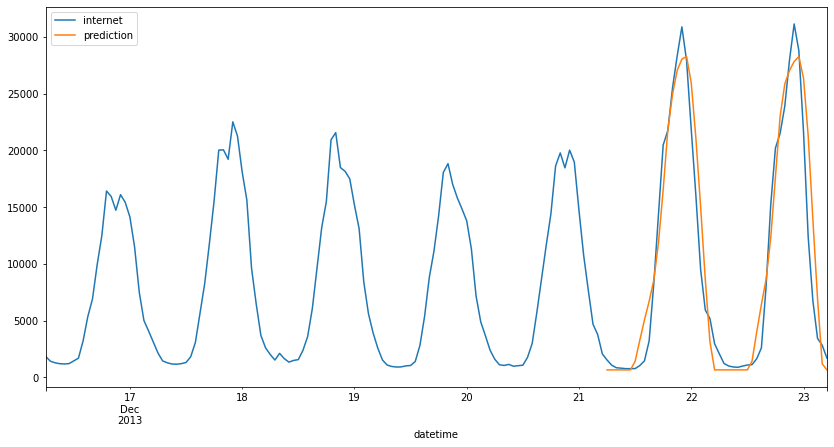

In [51]:
# create numpy array containing nan
temp = np.empty((df_test.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(test_predict):] = test_predict

df_test["prediction"] = temp

# visualize
df_test.plot(figsize=(14, 7))

In [53]:
# your code here

# TEST RMSE
df_test = df_test.dropna()
mean_squared_error(
    y_true=df_test['internet'],
    y_pred=df_test['prediction'],
    squared=False #agar mengembalikan root mean squared error
)

2809.036626699898

**5. Prediction for future dates**

We’ll use our trained model to predict the traffic into the future and inverse the scaled data. The first thing we should do is generate future dates in a dataframe. We purposely create future dates based on the last date in `df_5161` dataset.

In [54]:
look_ahead = 24*3

In [55]:
from pandas.tseries.offsets import DateOffset

In [57]:
df_5161.index

DatetimeIndex(['2013-12-01 06:00:00', '2013-12-01 07:00:00',
               '2013-12-01 08:00:00', '2013-12-01 09:00:00',
               '2013-12-01 10:00:00', '2013-12-01 11:00:00',
               '2013-12-01 12:00:00', '2013-12-01 13:00:00',
               '2013-12-01 14:00:00', '2013-12-01 15:00:00',
               ...
               '2013-12-22 20:00:00', '2013-12-22 21:00:00',
               '2013-12-22 22:00:00', '2013-12-22 23:00:00',
               '2013-12-23 00:00:00', '2013-12-23 01:00:00',
               '2013-12-23 02:00:00', '2013-12-23 03:00:00',
               '2013-12-23 04:00:00', '2013-12-23 05:00:00'],
              dtype='datetime64[ns]', name='datetime', length=528, freq=None)

In [56]:
# create future dates
add_dates = [df_5161.index[-1] + DateOffset(hours=x) for x in range(look_ahead+1)]
future_dates = pd.DataFrame(index=add_dates[1:])
future_dates

""
2013-12-23 06:00:00
2013-12-23 07:00:00
2013-12-23 08:00:00
2013-12-23 09:00:00
2013-12-23 10:00:00
...
2013-12-26 01:00:00
2013-12-26 02:00:00
2013-12-26 03:00:00
2013-12-26 04:00:00


In order to predict future value (after testing data), we have to manually create a loop to feed the network. The steps in function `forecast_future` are:

1. Take `look_back` values from the rear of `data` and reshape to 3 dimension
2. Feed data from step 1 into the `trained_model`
3. Save the prediction to a list
4. Use the prediction to update the batch and remove the first value
5. Go back to step 2, but with the updated batch

In [58]:
def forecast_future(trained_model, data, look_back, n_features, look_ahead):
    prediction_list = []
    current_batch = data[-look_back:].reshape((1, look_back, n_features))
    
    for i in range(look_ahead):
        # get the prediction value for the first batch
        current_pred = trained_model.predict(current_batch)[0]

        # append the prediction into the list
        prediction_list.append(current_pred)

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
        
    return np.array(prediction_list)

In [59]:
scaled_future = forecast_future(trained_model=model_lstm,
                                data=scaled_test, #data aktual paling belakang
                                look_back=look_back, #24 * 5
                                n_features=1, #univariate
                                look_ahead=look_ahead) #24*3

1/1 [==============================] - 0s 45ms/step


Do not forget to inverse transform the forecasted value.

In [60]:
future_dates['future'] = scaler.inverse_transform(scaled_future)

In [61]:
future_dates

,future
2013-12-23 06:00:00,650.396118
2013-12-23 07:00:00,650.396118
2013-12-23 08:00:00,650.396118
2013-12-23 09:00:00,650.396118
2013-12-23 10:00:00,650.396118
...,...
2013-12-26 01:00:00,20792.402344
2013-12-26 02:00:00,16556.347656
2013-12-26 03:00:00,12027.590820
2013-12-26 04:00:00,7391.051270


We concatenate the forecasted value with actual value and then visualize it.

<AxesSubplot:>

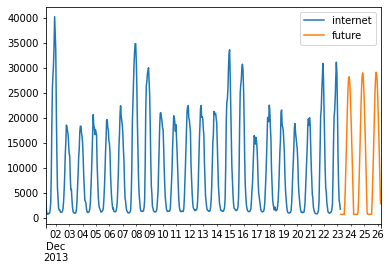

In [62]:
pd.concat([df_5161, future_dates], axis=1).plot()

# GRU

The workflow of the Gated Recurrent Unit (GRU) is the same as the RNN, but the difference is in the operation and gates associated with each GRU unit. It combines the forget and input gates into a single update gate. **GRU is computationally more efficient than LSTM** due to its fewer parameters and less complex structure. To solve the problem faced by standard RNN, GRU incorporates the two gate operating mechanisms called Update gate and Reset gate.

<figure>
    <center>
    <img src="assets/GRU.png" width="50%">
<figcaption>Source: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</figcaption> 
    </center>
</figure>

- **Update gate**: The update gate is responsible for determining the amount of previous information that needs to pass along the next state. This is really powerful because the model can decide to copy all the information from the past and eliminate the risk of vanishing gradient.

- **Reset gate**: The reset gate is used from the model to decide how much of the past information is needed to neglect; in short, it decides whether the previous cell state is important or not.

Mathematically, GRU can be illustrated as below:

<figure>
    <center>
    <img src="assets/LSTM3-var-GRU.png" width="70%">
<!--     <figcaption>Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/</figcaption> -->
    </center>
</figure>

# Variant of RNN: Bidirectional RNN (BRNN)

A typical state in an RNN (simple RNN, GRU, or LSTM) relies on the past and the present events. A state at time $t$ depends on the states $x_1, x_2, ... x_{t-1}$ and $x_t$. However, there can be situations where a prediction depends on the past, present, and future events. To enable straight (past) and reverse traversal of input (future), Bidirectional RNNs, or BRNNs, are used. A BRNN is a combination of two RNNs - **one RNN moves forward**, beginning from the start of the data sequence, and the other, **moves backward**, beginning from the end of the data sequence (Mind you; this is __not__ the same as the backpropagation process.). The network blocks in a BRNN can either be simple RNNs, GRUs, or LSTMs.

<figure>
    <center>
    <img src="assets/brnn.png" width="70%">
    <figcaption>Source: http://colah.github.io/posts/2015-09-NN-Types-FP/</figcaption>
    </center>
</figure>

For example, suppose you want to solve the Named Entity Recognition problem, and you face these sentences:
1. *__Palu__ itu terletak di atas meja*
2. *Aku baru tau __Palu__ itu Ibukota dari Sulawesi Tengah*

Is 'Palu' a tool (martil) or a City? You can directly know the answer after you read the next words. Let's look at the second sentence and make it as if an input to BRNN.

<figure>
    <center>
    <img src="assets/brnn_example.png" width="70%">
    </center>
</figure>

Notice that output $Y_3$ has influence not only from word 'Aku', 'baru', 'tau' from input $X_0$ to $X_1$, but also from future words as well. 'itu Ibukota Sulawesi Tengah' sentence influence $Y_3$ output from layer $A'$ direction.

## 🏄‍ Dive Deeper: Build BRNN Model

We can use Keras [Bidirectional](https://keras.io/api/layers/recurrent_layers/bidirectional/) layer. 
Syntactically, we will wrap the RNN layer with Bidirectional as follows:

```{python}
keras.layers.Bidirectional(keras.layers.___(...))
```

Where the `___` can be filled by types of RNN, such as:
- `SimpleRNN`
- `LSTM`
- `GRU`

# 📝 Summary

Here's a few points that cover the course:

- RNNs allow a lot of flexibility in architecture design
- Vanilla RNNs are simple but don’t work very well
- Common to use LSTM or GRU: their additive interactions improve gradient flow
- Backward flow of gradients in RNN can explode or vanish. Vanishing is controlled with additive interactions (LSTM)
- `return_sequences=True` is a important parameter if we want to make deep stacked layers. It returns 3 dimension input to the next layer.

___

# External Links

___

- [Adam](https://arxiv.org/pdf/1412.6980.pdf)
- [HDF5 Data Type](https://support.hdfgroup.org/HDF5/doc1.6/UG/11_Datatypes.html)
- [Keras Sequential Model](https://keras.io/guides/sequential_model)
- [Keras Dense Layer](https://keras.io/api/layers/core_layers/dense/)
- [L1 vs L2 Regularization](https://explained.ai/regularization/L1vsL2.html)
- [Neuron Transmits Messages In The Brain - Genetic Science Learning Center](http://learn.genetics.utah.edu/content/neuroscience/neurons/)
- [Relu](http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf)
- [RMSProp](https://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6.pdf)
- http://colah.github.io/posts/2015-08-Understanding-LSTMs/
- https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
- https://karpathy.github.io/2015/05/21/rnn-effectiveness/